<a href="https://colab.research.google.com/github/daiyanKHAN26/An-Efficient-Deep-Learning-Approach-to-Detecting-Skin-Cancer/blob/main/Final_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import pandas as pd
import datetime

import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import array_to_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, BatchNormalization, Dropout, Dense, MaxPool2D
from keras.callbacks import ReduceLROnPlateau

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
raw_supp_data = pd.read_csv('/content/drive/MyDrive/HAM10000/HAM10000_metadata.csv')
raw_supp_data = raw_supp_data

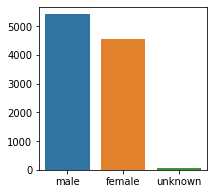

In [ ]:
#gender
data_supp = raw_supp_data.iloc[:,5:6]
labels_supp = raw_supp_data.iloc[:,5:6]
type_supp = ['male','female','unknown']
counts_supp = list(labels_supp.value_counts())
plt.figure(figsize = (3,3))
sns.barplot(x = type_supp, y = counts_supp)

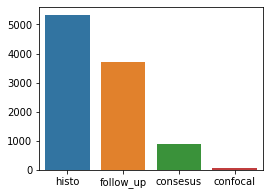

In [ ]:
#method of result
data_supp = raw_supp_data.iloc[:,3:4]
labels_supp = raw_supp_data.iloc[:,3:4]
type_supp = ['histo','follow_up','consesus','confocal']
counts_supp = list(labels_supp.value_counts())
plt.figure(figsize = (4,3))
sns.barplot(x = type_supp, y = counts_supp)

[Text(0, 0, 'back'),
 Text(0, 0, 'lower extremity'),
 Text(0, 0, 'trunk'),
 Text(0, 0, 'upper extremity'),
 Text(0, 0, 'abdomen'),
 Text(0, 0, 'face'),
 Text(0, 0, 'chest'),
 Text(0, 0, 'foot'),
 Text(0, 0, 'unknown'),
 Text(0, 0, 'neck'),
 Text(0, 0, 'scalp'),
 Text(0, 0, 'hand'),
 Text(0, 0, 'ear'),
 Text(0, 0, 'genital'),
 Text(0, 0, 'acral')]

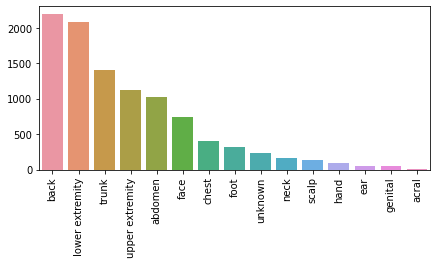

In [ ]:
#localization
data_supp = raw_supp_data.iloc[:,6:7]
labels_supp = raw_supp_data.iloc[:,6:7]
type_supp = ['back','lower extremity','trunk','upper extremity','abdomen','face','chest','foot','unknown','neck','scalp','hand','ear','genital','acral']
counts_supp = list(labels_supp.value_counts())
plt.figure(figsize = (7,3))
plot = sns.barplot(x = type_supp, y = counts_supp)
plot.set_xticklabels(plot.get_xticklabels(),rotation = 90)

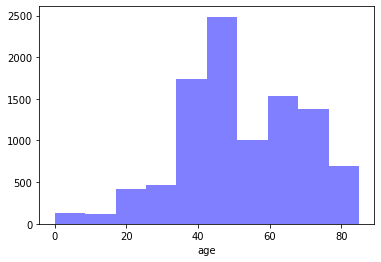

In [ ]:
data_supp = raw_supp_data
ax = plt.gca()
ax.hist(data_supp['age'], color='blue',alpha=0.5, bins=10)
plt.xlabel('age')
plt.show()

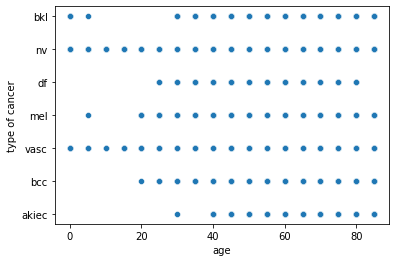

In [ ]:
#age_to_cancer
data_supp = raw_supp_data
sns.scatterplot(data=data_supp, x="age", y="dx")
plt.xlabel('age')
plt.ylabel('type of cancer') 
plt.show()

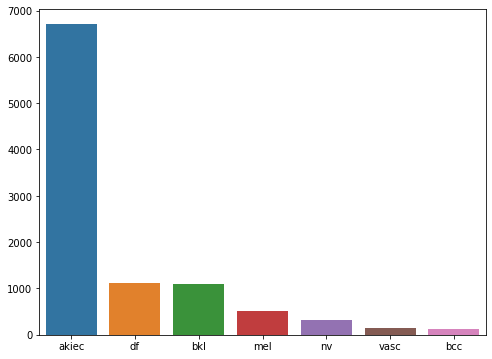

In [ ]:
raw_data = pd.read_csv('/content/drive/MyDrive/HAM10000/hmnist_28_28_RGB.csv')
raw_data = raw_data.sample(frac = 1)
data = raw_data.iloc[:,:-1]
labels = raw_data.iloc[:,-1:]

type_cancer = ['akiec','df','bkl','mel','nv','vasc','bcc']
counts = list(labels.value_counts())
plt.figure(figsize = (8,6))
sns.barplot(x = type_cancer, y = counts)

In [ ]:
raw_data = pd.read_csv('/content/drive/MyDrive/HAM10000/hmnist_28_28_RGB.csv')
raw_data = raw_data.sort_values('label')
raw_data = raw_data.reset_index()

index0 = raw_data[raw_data['label'] == 0].index.values
index1 = raw_data[raw_data['label'] == 1].index.values
index2 = raw_data[raw_data['label'] == 2].index.values
index3 = raw_data[raw_data['label'] == 3].index.values
index5 = raw_data[raw_data['label'] == 5].index.values
index6 = raw_data[raw_data['label'] == 6].index.values

df_index0 = raw_data.iloc[int(min(index0)):int(max(index0)+1)]
df_index1 = raw_data.iloc[int(min(index1)):int(max(index1)+1)]
df_index2 = raw_data.iloc[int(min(index2)):int(max(index2)+1)]
df_index3 = raw_data.iloc[int(min(index3)):int(max(index3)+1)]
df_index5 = raw_data.iloc[int(min(index5)):int(max(index5)+1)]
df_index6 = raw_data.iloc[int(min(index6)):int(max(index6)+1)]


df_index0 = df_index0.append([df_index0]*17, ignore_index = True)
df_index1 = df_index1.append([df_index1]*15, ignore_index = True)
df_index2 = df_index2.append([df_index2]*5, ignore_index = True)
df_index3 = df_index3.append([df_index3]*52, ignore_index = True)
df_index5 = df_index5.append([df_index5]*45, ignore_index = True)
df_index6 = df_index6.append([df_index6]*5, ignore_index = True)

frames = [raw_data, df_index0, df_index1, df_index2, df_index3, df_index5, df_index6]

final_data = pd.concat(frames)
final_data.drop('index', inplace = True, axis = 1)
final_data = final_data.sample(frac = 1)
data = final_data.iloc[:,:-1]
labels = final_data.iloc[:,-1:]

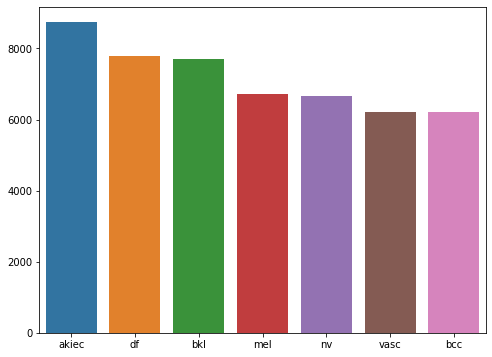

In [ ]:
type_cancer = ['akiec','df','bkl','mel','nv','vasc','bcc']
counts = list(labels.value_counts())
plt.figure(figsize = (8,6))
sns.barplot(x = type_cancer, y = counts)

In [ ]:
X = np.array(data)
Y = np.array(labels)

# reshaping the data

X = X.reshape(-1,28,28,3)

print("SHAPE OF X IS: ", X.shape)
print("SHAPE OF Y IS: ", Y.shape)

SHAPE OF X IS:  (50024, 28, 28, 3)
SHAPE OF Y IS:  (50024, 1)


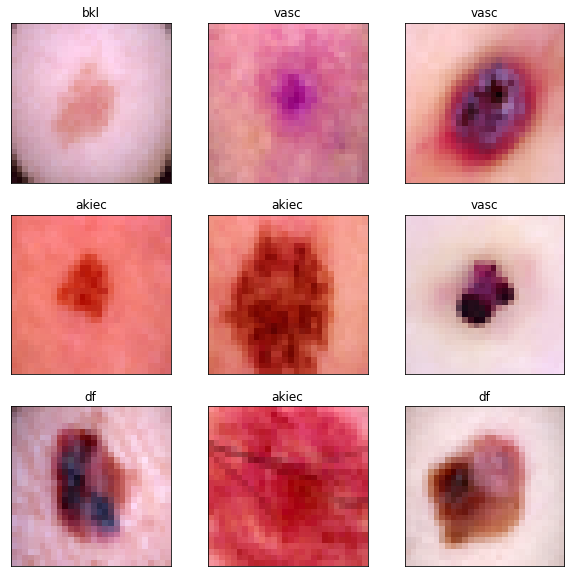

In [ ]:
def visualisePlots(X,Y, rows, columns):
    class_dicts = {
        0: 'nv',
        1: 'mel',
        2: 'bkl',
        3: 'bcc',
        4: 'akiec',
        5: 'vasc',
        6: 'df', 
    }
    
    data = []
    target = []

    for i in range(rows*columns):
        data.append(X[i])
        target.append(Y[i])

    width = 10
    height = 10
    fig = plt.figure(figsize=(10,10))
    for i in range(columns*rows):
        temp_img = array_to_img(data[i])
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(temp_img)
        plt.xticks([])
        plt.yticks([])
        plt.title(str(class_dicts[target[i][0]]))
    plt.show()
    
# using the above function

visualisePlots(X,Y, 3,3)

In [ ]:
X = (X-np.mean(X))/np.std(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 10,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  shear_range = 0.2,
                                  horizontal_flip = True,
                                  vertical_flip = True,
                                  fill_mode = 'nearest')
train_datagen.fit(X_train)

test_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen.fit(X_test)

train_data = train_datagen.flow(X_train, Y_train, batch_size = 64)
test_data = test_datagen.flow(X_test, Y_test, batch_size = 64)

In [ ]:
model = Sequential()
model.add(Conv2D(16, kernel_size = (3,3), input_shape = (28, 28, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
#
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
#
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
#
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu'))
model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu', padding = 'same'))
#
model.add(MaxPool2D(pool_size = (2,2), padding = 'same'))

model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2,2), padding = 'same'))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
#
model.add(Dense(16, activation='relu'))
#
model.add(Dense(7, activation='softmax'))


learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00075,
                                    beta_1 = 0.9,
                                    beta_2 = 0.999,
                                    epsilon = 1e-8)

model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = optimizer,
              metrics = ['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 64)          3

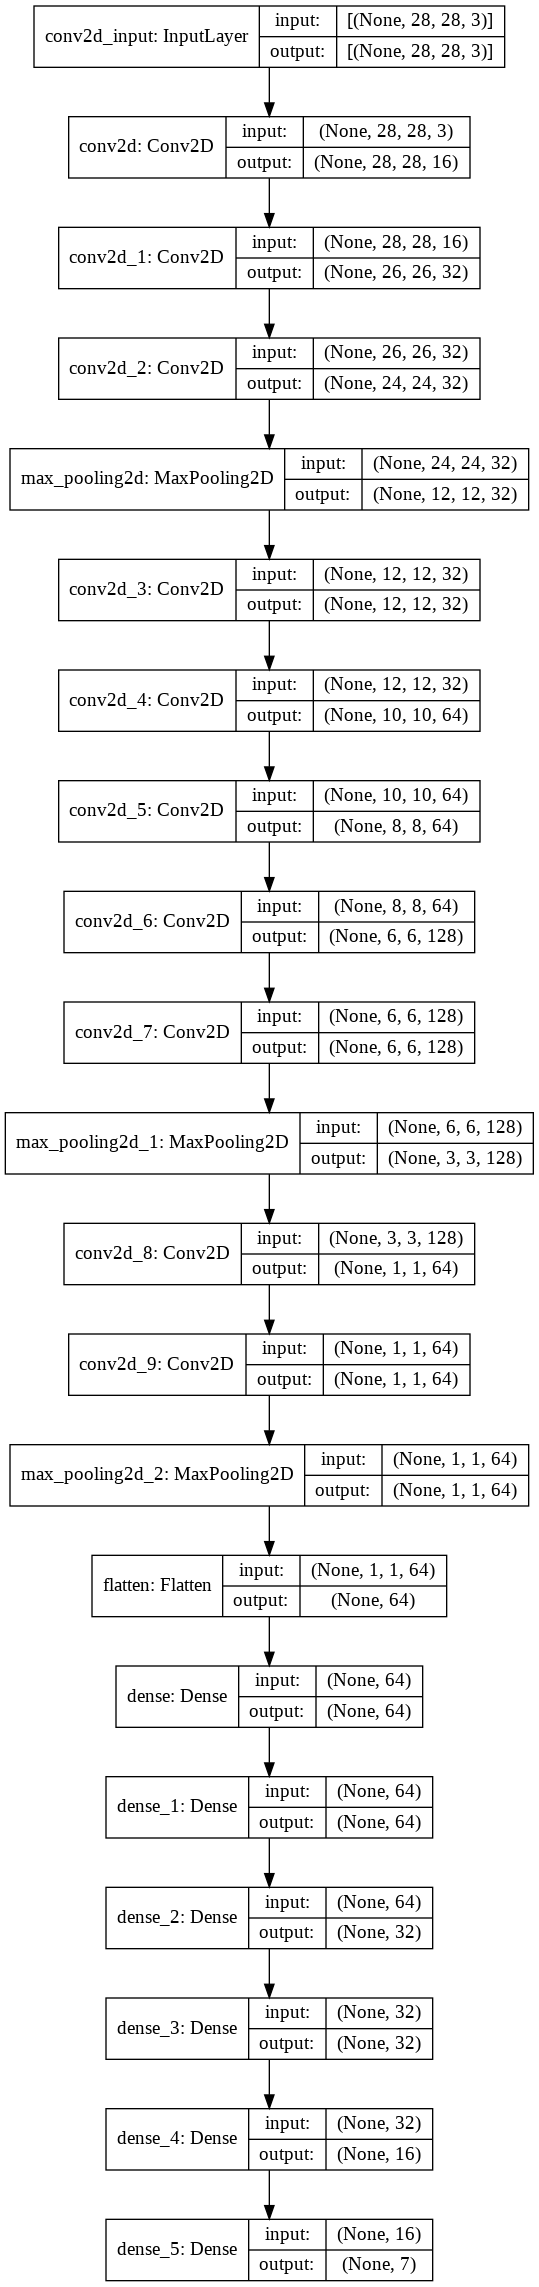

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
### TRAINING THE MODEL

start_model = datetime.datetime.now()

history = model.fit(X_train,
                    Y_train,
                    validation_split=0.2,
                    batch_size = 64,
                    epochs = 20,
                    callbacks=[learning_rate_reduction])

end_model = datetime.datetime.now()

Epoch 1/20
501/501 [==============================] - 152s 302ms/step - loss: 1.4733 - accuracy: 0.3881 - val_loss: 1.3556 - val_accuracy: 0.4367
Epoch 2/20
501/501 [==============================] - 151s 302ms/step - loss: 1.0878 - accuracy: 0.5499 - val_loss: 1.0124 - val_accuracy: 0.6014
Epoch 3/20
501/501 [==============================] - 154s 307ms/step - loss: 0.8040 - accuracy: 0.6875 - val_loss: 0.7498 - val_accuracy: 0.7089
Epoch 4/20
501/501 [==============================] - 160s 319ms/step - loss: 0.5974 - accuracy: 0.7756 - val_loss: 0.4927 - val_accuracy: 0.8132
Epoch 5/20
501/501 [==============================] - 159s 318ms/step - loss: 0.4691 - accuracy: 0.8225 - val_loss: 0.5293 - val_accuracy: 0.8080
Epoch 6/20
501/501 [==============================] - 159s 318ms/step - loss: 0.4064 - accuracy: 0.8472 - val_loss: 0.4268 - val_accuracy: 0.8416
Epoch 7/20
501/501 [==============================] - 160s 319ms/step - loss: 0.3210 - accuracy: 0.8803 - val_loss: 0.4036 -

In [ ]:
model.save('/content/drive/MyDrive/HAM10000/model/keras_sequential_sixth_model_final.h5')

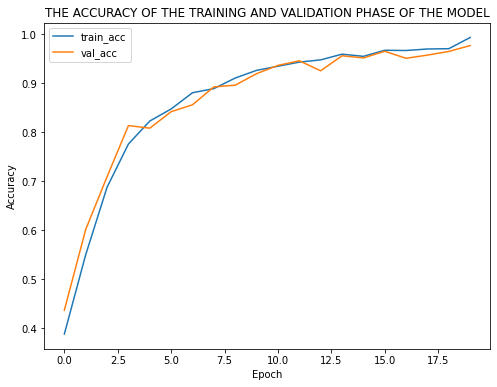

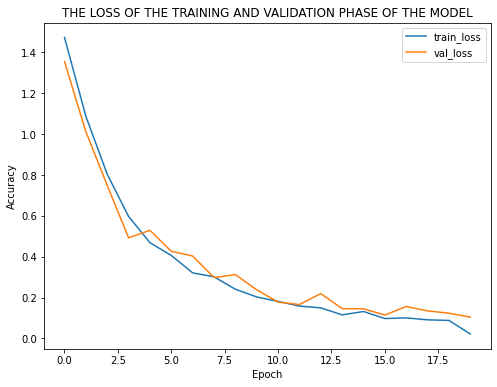

In [ ]:
ACC = history.history['accuracy']
VAL_ACC = history.history['val_accuracy']

plt.figure(figsize=(8,6))
plt.title("THE ACCURACY OF THE TRAINING AND VALIDATION PHASE OF THE MODEL")
plt.plot(ACC, label = 'train_acc')
plt.plot(VAL_ACC, label = 'val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy') 
plt.legend()

LOSS = history.history['loss']
VAL_LOSS = history.history['val_loss']

plt.figure(figsize=(8,6))
plt.title("THE LOSS OF THE TRAINING AND VALIDATION PHASE OF THE MODEL")
plt.plot(LOSS, label = 'train_loss')
plt.plot(VAL_LOSS, label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy') 
plt.legend()

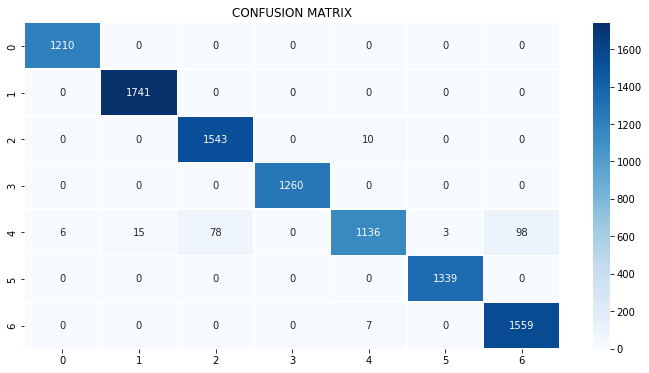

In [ ]:
Y_true = np.array(Y_test)

Y_pred = model.predict(X_test)
Y_pred = np.array(list(map(lambda x: np.argmax(x), Y_pred)))

cm1 = confusion_matrix(Y_true, Y_pred)
plt.figure(figsize=(12, 6))
plt.title('CONFUSION MATRIX')

# matrix_data.heatmap(annot = True, fmt = 'g', vmin = 0, cmap = 'Blues')
sns.heatmap(cm1, annot = True, fmt = 'g', vmin = 0, cmap = 'Blues', linewidths=.5)

THE PLOTS TESTING WITH THE MODEL


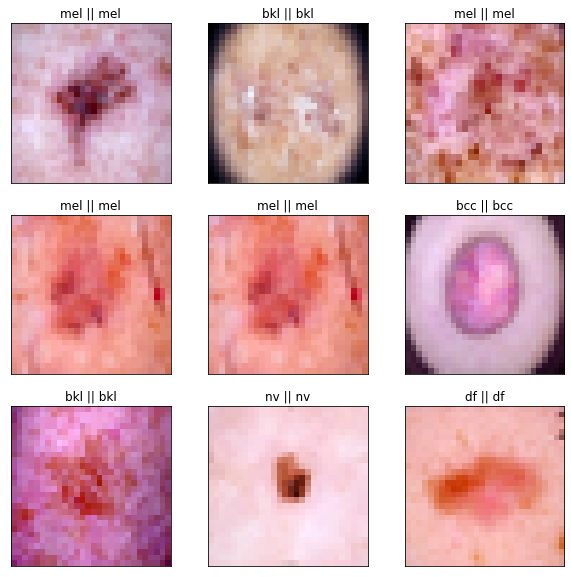

In [ ]:
def visualisePlots_test(X,Y, model, rows, columns):
    class_dicts = {
        0: 'nv',
        1: 'mel',
        2: 'bkl',
        3: 'bcc',
        4: 'akiec',
        5: 'vasc',
        6: 'df', 
    }
    
    data = []
    target = []
    
    Y_pred = model.predict(X)
    Y_pred = np.array(list(map(lambda x: np.argmax(x), Y_pred)))

    for i in range(rows*columns):
        data.append(X[i])
        target.append(Y[i])

    width = 10
    height = 10
    fig = plt.figure(figsize=(10,10))
    for i in range(columns*rows):
        temp_img = array_to_img(data[i])
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(temp_img)
        plt.xticks([])
        plt.yticks([])
        plt.title(str(class_dicts[target[i][0]]) + " || " + str(class_dicts[Y_pred[i]]))
    plt.show()
    
# USING THE MODELS AND VISUALISING THEM

print('THE PLOTS TESTING WITH THE MODEL')
visualisePlots_test(X_test,Y_test, model, 3, 3) 

In [ ]:
label_mapping = {
    0: 'nv',
    1: 'mel',
    2: 'bkl',
    3: 'bcc',
    4: 'akiec',
    5: 'vasc',
    6: 'df'
}

classification_report_model = classification_report(Y_true, Y_pred, target_names=label_mapping.values())
print(classification_report_model)

              precision    recall  f1-score   support

          nv       1.00      1.00      1.00      1210
         mel       0.99      1.00      1.00      1741
         bkl       0.95      0.99      0.97      1553
         bcc       1.00      1.00      1.00      1260
       akiec       0.99      0.85      0.91      1336
        vasc       1.00      1.00      1.00      1339
          df       0.94      1.00      0.97      1566

    accuracy                           0.98     10005
   macro avg       0.98      0.98      0.98     10005
weighted avg       0.98      0.98      0.98     10005



In [ ]:
time_model = end_model - start_model
print("TIME TAKEN BY MODEL : ", time_model)


model_acc_test = model.evaluate(X_test, Y_test, verbose=0)[1]
print("TEST ACCURACY OF MODEL: {:.3f}%".format(model_acc_test * 100))

TIME TAKEN BY MODEL :  0:53:23.090756
TEST ACCURACY OF MODEL: 97.831%
